# Lab 1: Perceptrón con Fuerza Bruta y Montecarlo

## Análisis Exploratorio.

Importar librerías

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Cargar y visualizar los datos.

In [6]:
data = pd.read_csv('dataset.csv')
print(data.head())

         X1        X2    Y
0  0.142131  0.845482  0.0
1  0.869759  0.708864  1.0
2  0.238923  0.919601  0.0
3  0.268460  0.431270  0.0
4  0.922154  0.470211  1.0


Plot de los datos.

X1 shape: (100,)
X2 shape: (100,)
Y shape: (100,)


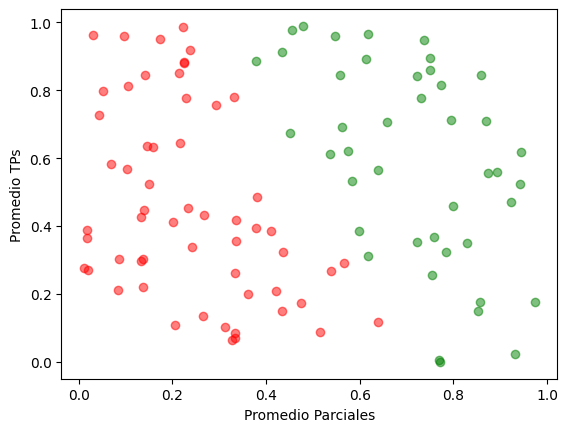

In [7]:
X1 = data['X1'].to_numpy()
X2 = data['X2'].to_numpy()
Y = data['Y'].to_numpy()

print("X1 shape:", X1.shape)
print("X2 shape:", X2.shape)
print("Y shape:", Y.shape)

plt.scatter(X1[Y == 0], X2[Y == 0], color='red', alpha=0.5)
plt.scatter(X1[Y == 1], X2[Y == 1], color='green', alpha=0.5)

plt.xlabel('Promedio Parciales')
plt.ylabel('Promedio TPs')

plt.show()

Definimos la función candidata.

In [8]:
def perceptron(x1, x2, params):
    linear_combination = x1 * params['w1'] + x2 * params['w2'] + params['b']
    return (linear_combination >= 0) * 1

Definimos una función costo, por ejemplo, el error absoluto medio.

In [9]:
def loss(y_predicted, y_real):
    return np.mean(np.absolute(y_predicted - y_real))

De ahora en adelante, el objetivo es encontrar los parámetros que minimicen la función costo.

Ejemplo con valores iniciales aleatorios:

In [17]:
params = {
    'w1': 1,
    'w2': -1,
    'b': 0
}

y_predicted = perceptron(X1, X2, params)

print('Loss:', loss(y_predicted, Y))

Loss: 0.36


Definimos una función para plotear la frontera de decisión sobre los datos.

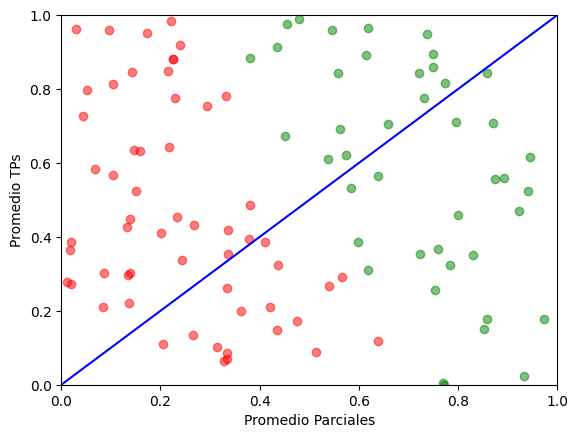

In [18]:
def plot_results(X1, X2, Y, params):
    plt.scatter(X1[Y == 0], X2[Y == 0], color='red', alpha=0.5)
    plt.scatter(X1[Y == 1], X2[Y == 1], color='green', alpha=0.5)

    plt.xlabel('Promedio Parciales')
    plt.ylabel('Promedio TPs')

    x1 = np.linspace(0, 1, 100)
    x2 = (-params['w1'] * x1 - params['b']) / params['w2']
    plt.plot(x1, x2, color='blue')
    
    # Limit the ranges from 0 to 1
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.show()

plot_results(X1, X2, Y, params)

## Búsqueda por fuerza bruta.
La idea es recorrer todos los valores posibles de los parámetros y quedarnos con aquellos que minimicen la función costo.

Best loss: 0.0
Best params: {'w1': 0.040000000000000924, 'w2': 0.020000000000000906, 'b': -0.02999999999999914}


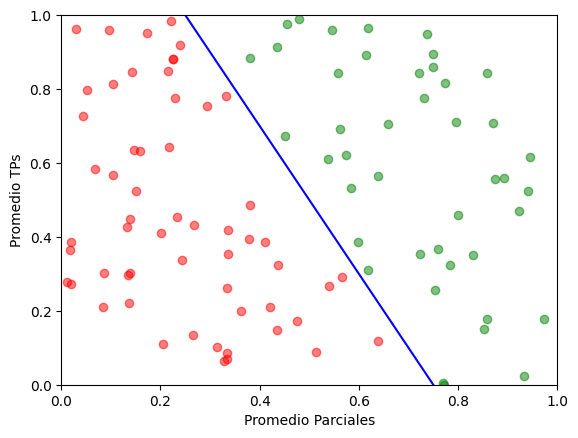

In [22]:
STEP = 0.01
MIN = -1
MAX = 1
W1 = np.arange(MIN, MAX, STEP)
W2 = np.arange(MIN, MAX, STEP)
B = np.arange(MIN, MAX, STEP)

params = {
    'w1': 0,
    'w2': 0,
    'b': 0
}

best_loss = 1

for w1 in W1:
    for w2 in W2:
        for b in B:
            params = {
                'w1': w1,
                'w2': w2,
                'b': b
            }
            y_predicted = perceptron(X1, X2, params)
            l = loss(y_predicted, Y)
            if l < best_loss:
                best_loss = l
                best_params = params

print('Best loss:', best_loss)
print('Best params:', best_params)

plot_results(X1, X2, Y, best_params)

## Método Monte Carlo.
La idea es generar valores aleatorios para los parámetros y quedarse con el que minimiza la función costo.

Best loss: 0.0
Best params: {'w1': 0.928890575629828, 'w2': 0.4521244639995372, 'b': -0.6629143429500621}


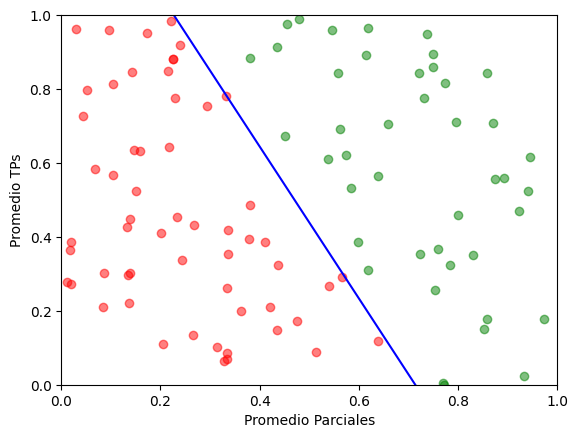

In [23]:
best_loss = 1
best_params = params.copy()

ITERATIONS = 10000

for i in range(ITERATIONS):
    params['w1'] = np.random.uniform(-1, 1)
    params['w2'] = np.random.uniform(-1, 1)
    params['b'] = np.random.uniform(-1, 1)

    y_predicted = perceptron(X1, X2, params)
    l = loss(y_predicted, Y)

    if l < best_loss:
        best_loss = l
        best_params = params.copy()

print('Best loss:', best_loss)
print('Best params:', best_params)

plot_results(X1, X2, Y, best_params)
